# Treinando modelos

## Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Regressão Linear

### Métodos dos mínimos quadrados

<p align='justify'>Função matemática que minimiza a função de custo: </p>

#### Gerando alguns dados com aparência linear

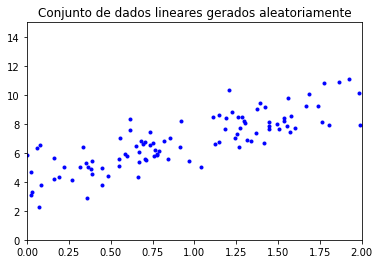

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.title('Conjunto de dados lineares gerados aleatoriamente')
plt.show()

#### Calculando o valor que minimiza a função de custo

In [3]:
X_b = np.c_[np.ones((100, 1)), X] #adiciona x0=1 a cada instância
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.14318433],
       [2.83873583]])

#### Fazendo previsões

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #adiciona x0=1 a cada instância
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.14318433],
       [9.820656  ]])

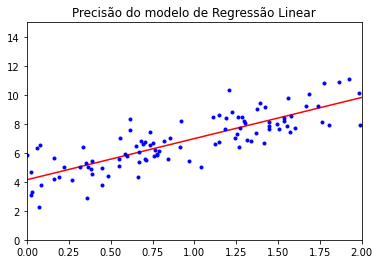

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.title('Precisão do modelo de Regressão Linear')
plt.show()

#### Equivalente usando Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.14318433]), array([[2.83873583]]))

In [7]:
lin_reg.predict(X_new)

array([[4.14318433],
       [9.820656  ]])

### Gradiente descendente em lote

In [8]:
eta = 0.1 #taxa de aprendizado
n_interations = 1000
m = 100
theta = np.random.randn(2, 1) #inicialização aleatória

for interation in range(n_interations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
theta

array([[4.14318433],
       [2.83873583]])

In [9]:
X_new_b.dot(theta)

array([[4.14318433],
       [9.820656  ]])

#### Gradiente descendente com várias taxas de aprendizado

In [10]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

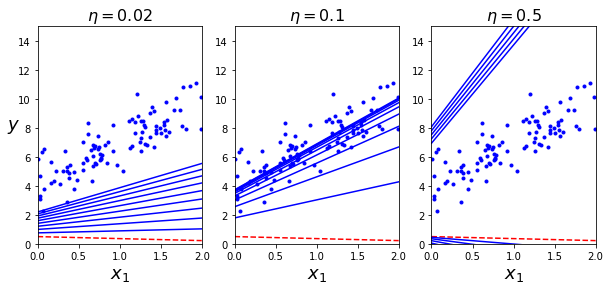

In [11]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

### Gradiente descendente estocástico

Theta: [[4.13063794]
 [2.90346426]]


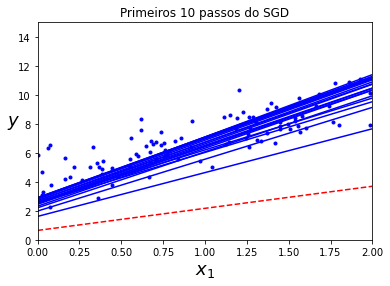

In [12]:
theta_path_sgd = []
n_epochs = 50
t0, t1 = 5, 50 #hiperparâmetros de aprendizado

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #inicialização aleatória

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style) 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
print(f'Theta: {theta}')
plt.plot(X, y, 'b.')                                 
plt.xlabel('$x_1$', fontsize=18)                     
plt.ylabel('$y$', rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15]) 
plt.title('Primeiros 10 passos do SGD')
plt.show()    

#### Scikit-learn

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.09174231]), array([2.78203133]))

### Gradiente descendente em minilotes

In [14]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta

array([[4.10327136],
       [2.77507418]])

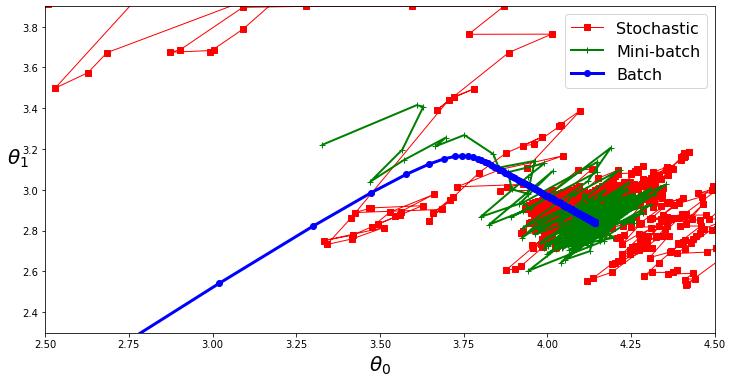

In [15]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)


plt.figure(figsize=(12, 6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label='Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3, label='Batch')
plt.legend(loc='upper right', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

### Regressão polinomial

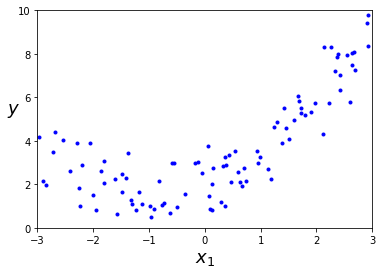

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[2.38942838]
[2.38942838 5.709368  ]


In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

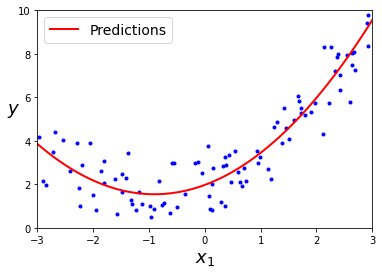

In [19]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Curva de aprendizado

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.figure(figsize=(12, 6))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)  

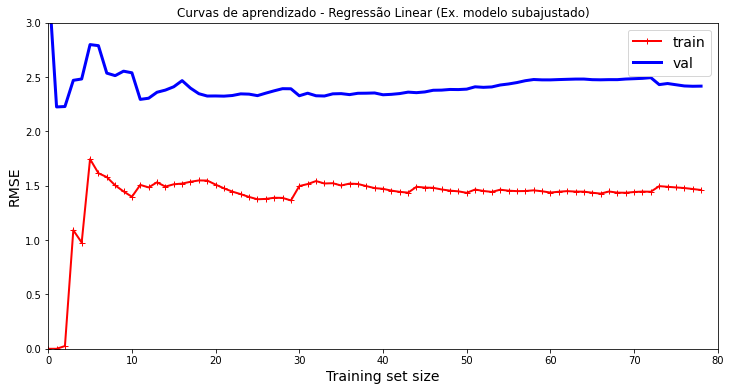

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.title('Curvas de aprendizado - Regressão Linear (Ex. modelo subajustado)')
plt.show()  

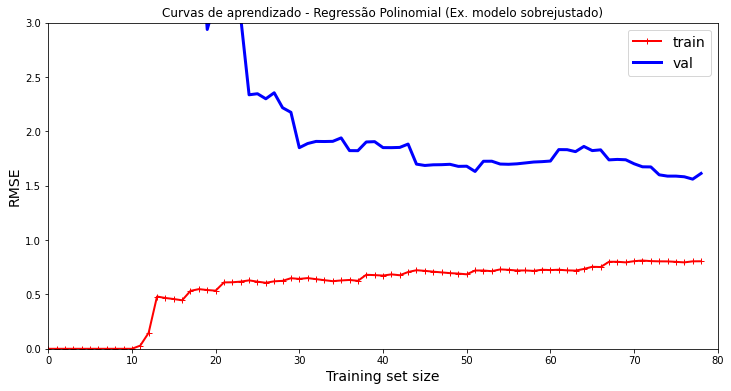

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('lin_reg', LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.title('Curvas de aprendizado - Regressão Polinomial (Ex. modelo sobrejustado)')
plt.show()                        

### Regressão Ridge

In [23]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20

X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

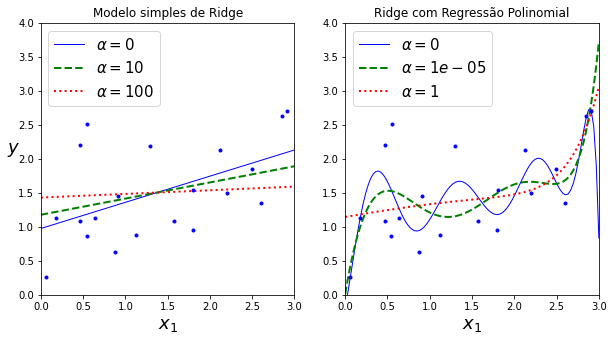

In [24]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                    ('std_scaler', StandardScaler()),
                    ('regul_reg', model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r'$\alpha = {}$'.format(alpha))
        
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend(loc='upper left', fontsize=15)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 3, 0, 4])


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Modelo simples de Ridge')
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(122)
plt.title('Ridge com Regressão Polinomial')
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

#### Usando uma solução de forma fechada

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

#### Usando Gradiente Descendente Estocástico

In [26]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

In [27]:
ridge_reg = Ridge(alpha=1, solver='sag')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55176416]])

### Regressão Lasso

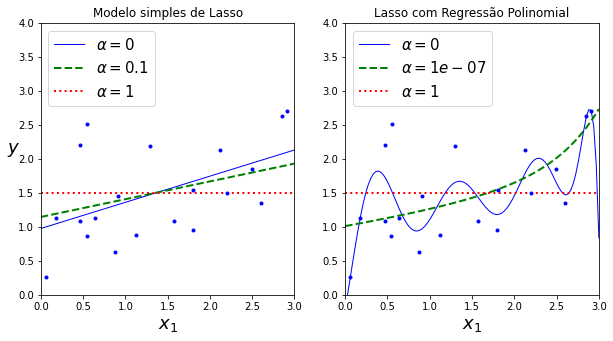

In [28]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Modelo simples de Lasso')
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(122)
plt.title('Lasso com Regressão Polinomial')
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

#### Com Scikit-Learn

In [29]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])